In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from loader import *
from models import *
from utils import *
from plotting import *

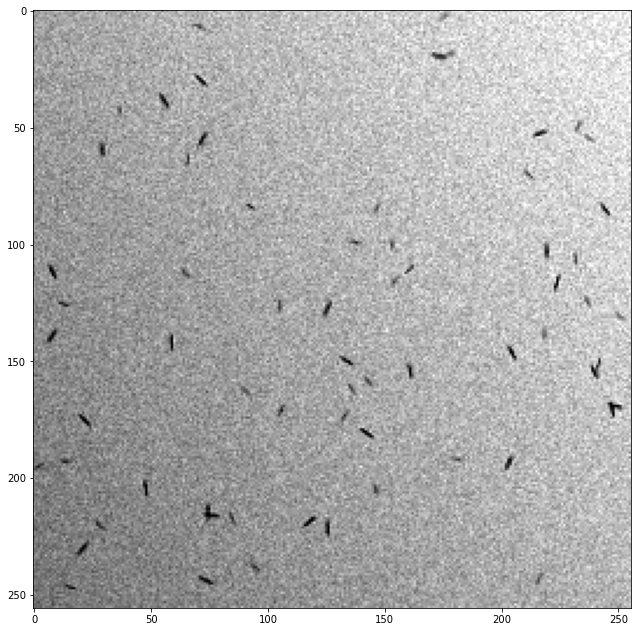

In [16]:
im_size_width, im_size_height = 256, 256

plankton_small = stationary_ellipsoid_plankton(im_size_height, im_size_width, radius=(1.5e-7, 9e-7, 1.5e-7), label=0)

plankton_big = stationary_ellipsoid_plankton(im_size_height, im_size_width, radius=(2e-7, 12e-7, 2e-7), label=0)

gradient_amp = 0.5
microscope = plankton_brightfield(im_size_height, im_size_width, gradient_amp)

# no_of_planktons = 50
# sample = create_sample(plankton, no_of_planktons)

no_of_small = lambda: np.random.randint(25, 50)
no_of_big = lambda: np.random.randint(25, 50)

sample = plankton_small**no_of_small + plankton_big**no_of_big


noise_amp = 4
norm_min, norm_max= -0.2, 1.2
image = create_image(noise_amp, sample, microscope, norm_min, norm_max)

plot_image(image)

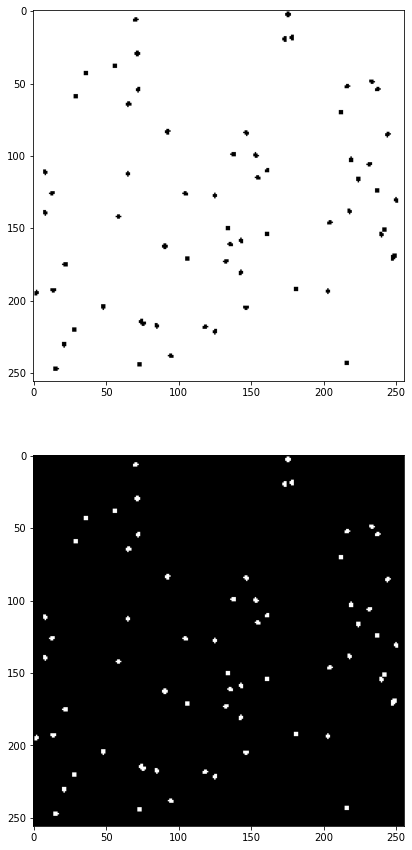

In [17]:
label = get_target_image(image.resolve())
label_function = get_target_image
plot_label(label_function, image)

In [18]:
batch_function = create_custom_batch_function(image, 
                                              outputs=[0], 
                                              function_img=[Normalize_image])

In [19]:
from deeptrack.generators import ContinuousGenerator
generator = ContinuousGenerator(
    image,
    get_target_image,
    batch_function,
    batch_size=8,
    min_data_size=128,
    max_data_size=512
    )

In [20]:
no_of_inputs, number_of_outputs = 1, 2
model = generate_unet(None, None, no_of_inputs, number_of_outputs)
model = train_model_early_stopping(model, generator, patience=10, epochs=200, steps_per_epoch=10)

Generating 131 / 128 samples before starting training
Epoch 1/200
10/10 [==============================] - 1s 66ms/step - loss: 0.0072
Epoch 2/200
10/10 [==============================] - 1s 61ms/step - loss: 0.0066
Epoch 3/200
10/10 [==============================] - 1s 64ms/step - loss: 0.0049
Epoch 4/200
10/10 [==============================] - 1s 62ms/step - loss: 0.0029
Epoch 5/200
10/10 [==============================] - 1s 66ms/step - loss: 0.0018
Epoch 6/200
10/10 [==============================] - 1s 60ms/step - loss: 0.0016
Epoch 7/200
10/10 [==============================] - 1s 64ms/step - loss: 0.0012
Epoch 8/200
10/10 [==============================] - 1s 61ms/step - loss: 9.7384e-04
Epoch 9/200
10/10 [==============================] - 1s 68ms/step - loss: 8.4884e-04
Epoch 10/200
10/10 [==============================] - 1s 71ms/step - loss: 8.4968e-04
Epoch 11/200
10/10 [==============================] - 1s 64ms/step - loss: 7.2467e-04
Epoch 12/200
10/10 [=================

10/10 [==============================] - 1s 61ms/step - loss: 2.5425e-04
Epoch 96/200
10/10 [==============================] - 1s 60ms/step - loss: 2.7817e-04
Epoch 97/200
10/10 [==============================] - 1s 62ms/step - loss: 2.7022e-04
Epoch 98/200
10/10 [==============================] - 1s 61ms/step - loss: 2.8059e-04
Epoch 99/200
10/10 [==============================] - 1s 59ms/step - loss: 2.5823e-04
Epoch 100/200
10/10 [==============================] - 1s 59ms/step - loss: 2.6206e-04: 0s - loss: 2.6672e
Epoch 101/200
10/10 [==============================] - 1s 59ms/step - loss: 2.5909e-04
Epoch 102/200
10/10 [==============================] - 1s 61ms/step - loss: 2.5233e-04
Epoch 103/200
10/10 [==============================] - 1s 58ms/step - loss: 2.6115e-04
Epoch 104/200
10/10 [==============================] - 1s 60ms/step - loss: 2.6713e-04
Epoch 105/200
10/10 [==============================] - 1s 61ms/step - loss: 2.5166e-04
Epoch 106/200
10/10 [====================

In [21]:
# save_path_model = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Copepods\\models\\one_frame_all_sizes.keras'
# model.save(save_path_model)

In [ ]:
# load_path_model = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Copepods\\models\\one_frame.keras'
# model = keras.models.load_model(load_path_model, custom_objects={'softmax_categorical':softmax_categorical})

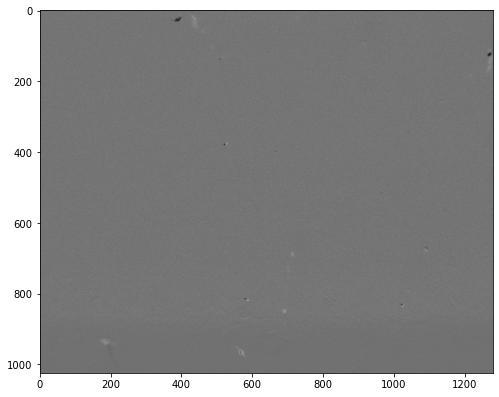

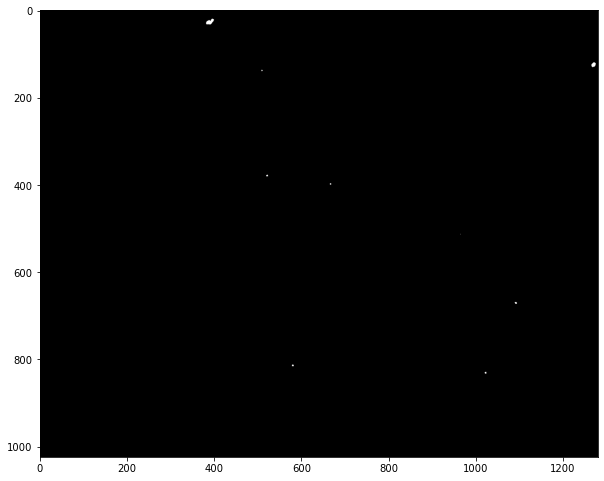

In [31]:
folder_path = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\From erik\\copepods'
im_stack = get_image_stack(
    outputs=[0], 
    folder_path=folder_path, 
    frame_im0=5, 
    im_size_width=1280, 
    im_size_height=1024,
    im_resize_width=1280, 
    im_resize_height=1024,
    function_img=[Normalize_image, RemoveRunningMean, Normalize_image],
    path_folder=folder_path,
    tot_no_of_frames=30, 
    im_height=1024,
    im_width=1280)


plot_image_stack(im_stack)
# plot_prediction(model=model, im_stack=im_stack)
plt.figure(figsize=(10,10))
plt.imshow(model.predict(im_stack)[0,:,:,1]>0.9, cmap='gray')

In [32]:
positions = extract_positions(
    no_of_frames=100, 
    outputs=[0], 
    folder_path=folder_path, 
    frame_im0=0, 
    im_size_width=1280, 
    im_size_height=1024,
    im_resize_width=1280, 
    im_resize_height=1024,
    model=model, 
    layer=1, 
    value_threshold=0.9,
    function_img=[Normalize_image, RemoveRunningMean, Normalize_image],
    path_folder=folder_path,
    tot_no_of_frames=30, 
    im_height=1024,
    im_width=1280
)


In [43]:
list_of_plankton = assign_positions_to_planktons(positions, max_dist=100, threshold = 5, extrapolate=True)
list_of_plankton = Interpolate_gaps_in_plankton_positions(list_of_plankton=list_of_plankton)
list_of_plankton = Trim_list_from_stationary_planktons(list_of_plankton=list_of_plankton, min_distance=0)

plankton_track, plankton_dont_track = split_plankton(percentage_threshold=0, list_of_plankton=list_of_plankton)

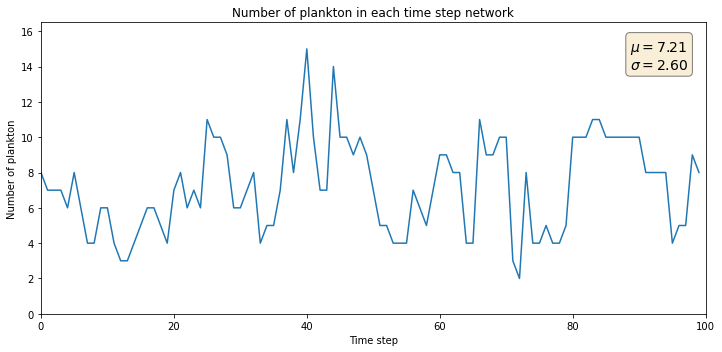

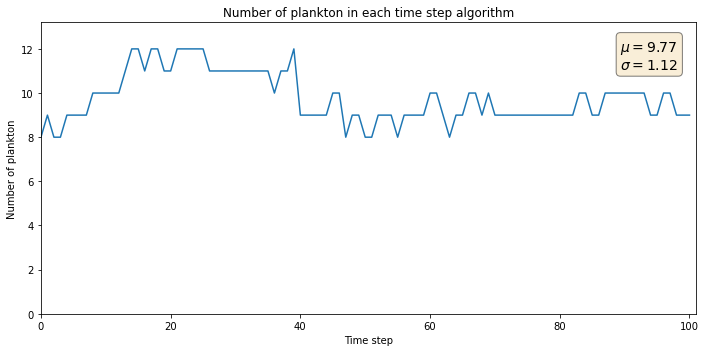

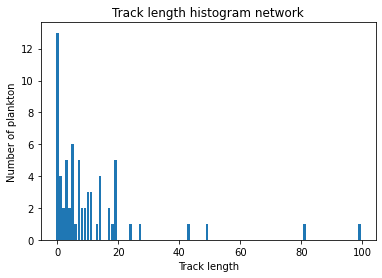

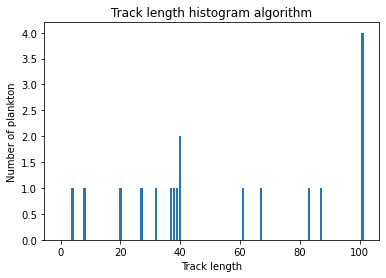

In [44]:
import xml.etree.ElementTree as ET

def plot_statistics(found_plankton_at_timestep, title):
    cropped_finds = found_plankton_at_timestep[np.nonzero(found_plankton_at_timestep)[0]]

    ax = plt.figure(figsize=(10,5))
    plt.plot(range(len(cropped_finds)), cropped_finds)
    plt.xlabel('Time step')
    plt.ylabel('Number of plankton')
    plt.title(title)
    plt.tight_layout()
    sigma = np.std(cropped_finds)
    mu = np.mean(cropped_finds)
    
    plt.axis([0, len(cropped_finds), 0, max(cropped_finds)*1.1])
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\sigma=%.2f$' % (sigma, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.88, 0.88, textstr, fontsize=14,
            verticalalignment='top', bbox=props)
    
def get_found_plankton_at_timestep(plankton_track):
    no_timesteps = len(plankton_track[list(plankton_track.keys())[0]].positions)
    found_plankton_at_timestep = np.zeros(no_timesteps)

    for plankton in plankton_track:
        plankton = np.array(plankton_track[plankton].positions[:,0], dtype=float)
        where_list = np.where(np.isfinite(plankton))
        for i in where_list[0]:
            found_plankton_at_timestep[i] += 1
    return found_plankton_at_timestep

def get_found_plankton_from_xml(path, no_timesteps, var_str):
    tree = ET.parse(path)
    root = tree.getroot()


    found_plankton_at_timestep = np.zeros(no_timesteps)

    for particle in root.iter():
        my_dict = particle.attrib
        if var_str in my_dict:
            found_plankton_at_timestep[int(float(my_dict[var_str]))] += 1
    return found_plankton_at_timestep


def plot_bars(track_durations, title):
    plt.figure()
    plt.bar(range(len(track_durations)), track_durations)
    
    plt.xlabel('Track length')
    plt.ylabel('Number of plankton')
    plt.title(title)



def get_track_durations(plankton_track):
    no_of_timesteps = len(plankton_track[list(plankton_track.keys())[0]].positions)
    track_durations = np.zeros(no_of_timesteps)
    for plankton in plankton_track:
        plankton = np.array(plankton_track[plankton].positions[:,0], dtype=float)
        where_list = np.where(np.isfinite(plankton))
        track_start = np.min(where_list)
        track_end = np.max(where_list)

        track_durations[track_end-track_start] += 1
    return track_durations


found_plankton_at_timestep = get_found_plankton_at_timestep(plankton_track)     
plot_statistics(found_plankton_at_timestep, 'Number of plankton in each time step network')

no_timesteps = 102
path = "E:\\Documents\\Master\\exjobb\\software\\Tracking\\copepods_Tracks.xml"
found_plankton_at_timestep = get_found_plankton_from_xml(path, no_timesteps, 't')
plot_statistics(found_plankton_at_timestep, 'Number of plankton in each time step algorithm')


track_durations = get_track_durations(plankton_track)
plot_bars(track_durations, 'Track length histogram network')


track_durations = get_found_plankton_from_xml(path, no_timesteps, 'nSpots')
plot_bars(track_durations, 'Track length histogram algorithm')

In [35]:
plot_and_save_track(no_of_frames=100,
                    plankton_track=plankton_track,
                    plankton_dont_track=plankton_dont_track,
                    folder_path=folder_path,
                    frame_im0=0,
                    save_images=0,
                    show_plankton_track = True,
                    show_plankton_dont_track = 0,
                    show_numbers_track = 0,
                    show_numbers_dont_track = 0,
                    show_numbers_specific_plankton = False,
                    show_specific_plankton = False,
                    specific_plankton = None,
                    color_plankton_track = 'b',
                    color_plankton_dont_track = 'r',
                    color_specific_plankton = 'w',
                    save_path = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Copepods\\track_all_size',
                    frame_name = 'track',
                    file_type = '.jpg')

In [45]:
# Make_video(frame_im0=0,
#            folder_path='E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Copepods\\track_all_size', 
#            save_path='E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Copepods\\all_sizes.avi', 
#            fps=7, 
#            no_of_frames=100)